# Bankrupcy prediction
First I imported the dataset which is in the ARFF format. Columns name were not in the file so I had to add them manually.

In [1]:
import xgboost
from matplotlib import pyplot
from scipy.io import arff
import pandas as pd
import os
import re

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, plot_importance
from catboost import CatBoostClassifier
import pandas                as     pd
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from bestalgo import get_best_algo

In [35]:
#create an array that contains all datasets
years=[]
for x in range(1,6):
    data = arff.loadarff(f'data/{x}year.arff')
    year = pd.DataFrame(data[0])
    pd.set_option('display.max_columns', 7)
    attributes = {}
    with open("data/attribute.txt", "r") as f:
        x = 1
        temp = f.read().splitlines()
        for line in temp:
            attributes["Attr" + str(x)] = re.sub(r"X[0-9]{1,2}|\[|\]", "", line)
            x += 1

    year["class"] = pd.to_numeric(year["class"])
    year.head()

    year = year.rename(columns=attributes)
    years.append(year)
len(years)
#use the first year for test
df = years[4]

In [3]:
df.head(100)

,net profit / total assets,total liabilities / total assets,working capital / total assets,...,sales / short-term liabilities,sales / fixed assets,class
0,0.200550,0.37951,0.396410,...,4.4158,7.4277,0
1,0.209120,0.49988,0.472250,...,3.4000,60.9870,0
2,0.248660,0.69592,0.267130,...,2.7185,5.2078,0
3,0.081483,0.30734,0.458790,...,4.2228,5.5497,0
4,0.187320,0.61323,0.229600,...,2.8692,7.8980,0
...,...,...,...,...,...,...,...
95,0.289480,0.45976,0.530660,...,4.1642,199.8100,0
96,0.115640,0.65440,0.587130,...,5.0050,18.0630,0
97,0.908560,0.54869,-0.001130,...,7.3503,6.1485,0
98,-0.006985,0.39142,0.374060,...,1.8983,3.1348,0


In [4]:
df.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,...,sales / short-term liabilities,sales / fixed assets,class
count,7024.000000,7024.000000,7024.000000,...,6997.000000,6993.000000,7027.000000
mean,0.034660,0.560215,0.119969,...,8.126852,208.731950,0.038566
std,4.565504,5.350084,5.275459,...,19.996419,5140.708804,0.192571
min,-256.890000,-72.162000,-440.500000,...,0.000015,0.000010,0.000000
25%,0.021182,0.296678,0.026968,...,3.425400,2.538600,0.000000
50%,0.075802,0.482960,0.181275,...,5.303200,4.637700,0.000000
75%,0.160268,0.680233,0.362548,...,8.357900,9.782200,0.000000
max,94.280000,441.500000,1.000000,...,1042.200000,294770.000000,1.000000


In [5]:
df[df["class"] == 1].head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,...,sales / short-term liabilities,sales / fixed assets,class
6756,0.030372,0.874460,0.081671,...,2.2881,33.7230,1
6757,0.032686,0.827750,0.020096,...,2.6474,1.8134,1
6758,0.649890,0.098723,0.483760,...,14.7930,3.4984,1
6759,0.075803,0.760570,-0.199050,...,4.0662,2.0941,1
6760,-0.179970,0.953480,-0.346650,...,1.2585,3.0519,1


In [6]:
print(f"Number of rows and columns : {df.shape[0]} rows, {df.shape[1]} columns ")

X = df[df.columns[:-1]]
Y = df[df.columns[-1]]

x_train, x_test, y_train, y_test = train_test_split(X, Y)


Number of rows and columns : 7027 rows, 65 columns 


In [ ]:
## Algorithm selection
I create a function in the bestalgo.py file, to find the best algorithm with cross validation.

In [7]:
perf_list, best_perf = get_best_algo(X,Y, cv=5)


['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_distributor_init', '_loss', 'base', 'clone', 'config_context', 'covariance', 'discriminant_analysis', 'exceptions', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'os', 'preprocessing', 'random', 'set_config', 'setup_module', 'show_versions', 'svm', 'sys', 'utils']
__SKLEARN_SETUP__
No module named 'sklearn.__SKLEARN_SETUP__'
__all__
No module named 'sklearn.__all__'
__builtins__
No module named 'sklearn.__builtins__'
__cached__
No module named 'sklearn.__cached__'
__check_build
__doc__
No module named 'sklearn.__doc__'
__file__
No module named 'sklearn.__file__'
__loader__
No module named 'sklearn.__loader__'
__name__
No module named 'sklearn.__name__'
__package__
No module named 'sklearn.__package__'
__path__
No module named 'sklearn.__path__'
__spec__
No mo

-0.3493684694146243
Linear regression with co
-0.004944520752532711
Elastic Net model with it
-0.002856088007698254
Generalized Linear Model
Some value(s) of y are out of the valid range for 
Linear regression model t
-295.5209541312389
Least Angle Regression mo
-4.143261237552813e+18
Cross-validated Least Ang
-0.010918853824386687
Linear Model trained with
-0.004885150326999677
Lasso linear model with i
-0.002856088007114721
Lasso model fit with Leas
-0.002883268819120399
Cross-validated Lasso, us
-0.002883268819120399
Lasso model fit with Lars
-0.010658112523877872
Ordinary least squar
-11.843265474032478
Logistic Regression
0.9887264150943397
Logistic Regression CV (a
0.9862106918238995
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCVCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCVCV
Orthogonal Matching Pursu
-0.0385122790396

In [8]:
perf_list.performance.sort_values(ascending=False)

Implementation of the sci      0.993742
C-Support Vector Classifi      0.992492
Ridge classifier with bui      0.992492
Classifier using Ridge re      0.992492
Quadratic Discriminant An      0.992492
Logistic Regression            0.988726
Logistic Regression CV (a      0.986211
Passive Aggressive Classi      0.981242
Linear Support Vector Cla      0.969953
Linear Discriminant Analy      0.967453
Linear classifiers (SVM,       0.891030
Perceptron\n\n    Read more    0.863569
An object for detecting o      0.007524
Name: performance, dtype: float64

<AxesSubplot:>

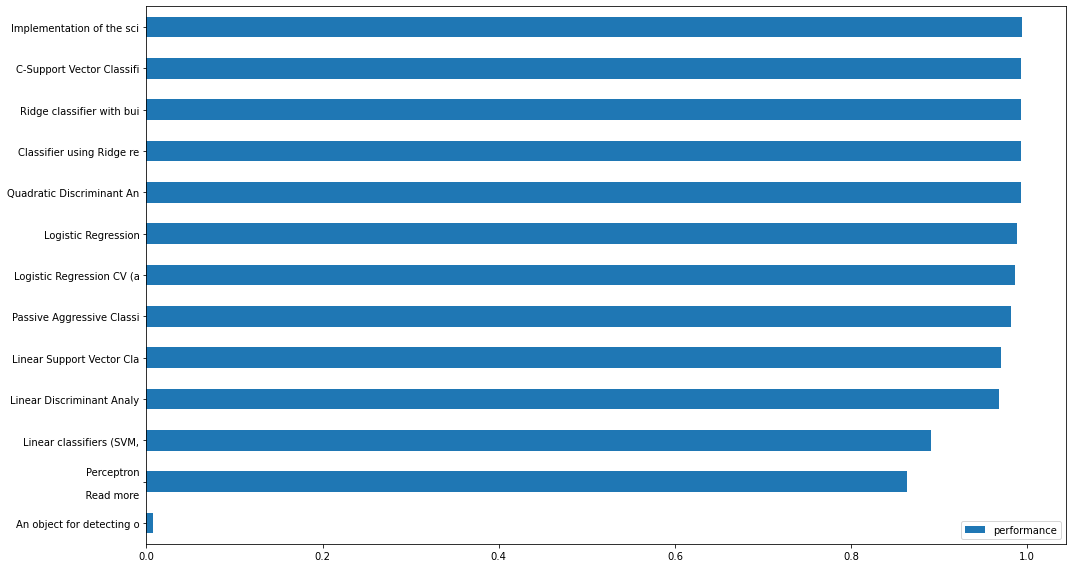

In [47]:
from matplotlib import rcParams
#feature pref

fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
perf_list.sort_values("performance").plot(kind='barh', ax=axes)

As we can see a lot of model have the same score. I choose to use XGBoost because it is a good tunable model.
In the result his name is :"Implementation of the sci"

# XBG
To measure the performance of this model I will use AUC indicator due to the imbalanced nature of the data.

In [9]:
xbg = XGBClassifier(use_label_encoder = False, eval_metric='logloss')
modele_xbg = xbg.fit(x_train, y_train)
y_model = modele_xbg.predict(x_test)
accuracy_score(y_test, y_model)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_model)
metrics.auc(fpr, tpr)

0.8384615384615385

In [10]:
score_xbg = cross_val_score(modele_xbg, X, Y, cv=10)
score_xbg.mean()

0.982637293163609

## Improve this score with cross validation
Cross validation wil use all the dataset and will prevent overfiting by split it in 10 sample.

In [11]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'eval_metric': 'auc',
    'objective':'binary:logistic',
}
#use xgboost matrix format
num_boost_round = 800
dtrain = xgboost.DMatrix(x_train, label=y_train)
dtest = xgboost.DMatrix(x_test, label=y_test)
cv_score1 = xgboost.cv(params, dtrain, num_boost_round=num_boost_round, nfold=10,   early_stopping_rounds=10, verbose_eval=1)

In [12]:
cv_score1

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.827353,2.193379e-02,0.809216,0.047632
1,0.900281,6.000522e-03,0.860777,0.040244
2,0.913636,1.130315e-02,0.876671,0.042060
3,0.932262,1.205785e-02,0.880583,0.042892
4,0.944869,7.827820e-03,0.885269,0.043589
5,0.959929,9.407968e-03,0.892169,0.036706
6,0.971516,8.749678e-03,0.905326,0.038914
7,0.985851,2.586711e-03,0.916832,0.035764
8,0.990841,2.173711e-03,0.925859,0.029459
9,0.993793,1.669194e-03,0.925694,0.027869


In [13]:
print(f'auc: {cv_score1["test-auc-mean"].mean()} std:{cv_score1["test-auc-std"].mean()}')

auc: 0.9313003166666667 std:0.02809308897099046


With cross validation we improve significantly the auc mean.

## Improve the model with tuning
Now we will try to improve model by tuning some parameter :
- max_depth
- min_child_weight
- subsample
- colsample_bytree
- eta
I create a function "find_best_param" wich take two parameter and find the best value in a specified range for each of them.

In [14]:
def find_best_param(gridsearch_params, param1, param2):
    best_mean_auc = 0
    best_params = None
    for value_1, value_2 in gridsearch_params:
        print("CV with {}={}, {}={}".format(param1, value_1,param2, value_2))    # Update our parameters
        custom_params=params.copy()
        custom_params[param1] = value_1
        custom_params[param2] = value_2    # Run CV
        cv_results = xgboost.cv(
            custom_params,
            dtrain,
            num_boost_round=num_boost_round,
            nfold=10,
            metrics='auc',
            early_stopping_rounds=10
        )
        # Update best auc
        mean_auc = cv_results['test-auc-mean'].mean()
        boost_rounds = cv_results['test-auc-mean'].argmin()
        print("AUC {} for {} rounds".format(mean_auc, boost_rounds))
        if mean_auc > best_mean_auc:
            best_mean_auc = mean_auc
            best_params = (value_1,value_2)
    print("Best params: {}:{}, {}:{}, AUC: {}".format(param1, best_params[0], param2,best_params[1], best_mean_auc))


In [15]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(4,9)
    for min_child_weight in range(1,3)
]
find_best_param(gridsearch_params,"max_depth", "min_child_weight")

CV with max_depth=4, min_child_weight=1
AUC 0.9382269468354434 for 0 rounds
CV with max_depth=4, min_child_weight=2
AUC 0.9395704493506493 for 0 rounds
CV with max_depth=5, min_child_weight=1
AUC 0.9349426492063494 for 0 rounds
CV with max_depth=5, min_child_weight=2
AUC 0.9138955809523809 for 0 rounds
CV with max_depth=6, min_child_weight=1
AUC 0.9313003166666667 for 0 rounds
CV with max_depth=6, min_child_weight=2
AUC 0.9241056303030303 for 0 rounds
CV with max_depth=7, min_child_weight=1
AUC 0.9238478250000001 for 0 rounds
CV with max_depth=7, min_child_weight=2
AUC 0.9290350374999999 for 0 rounds
CV with max_depth=8, min_child_weight=1
AUC 0.940064359090909 for 0 rounds
CV with max_depth=8, min_child_weight=2
AUC 0.9346011957446809 for 0 rounds
Best params: max_depth:8, min_child_weight:1, AUC: 0.940064359090909


Best value with max_depth=8

In [17]:
params["max_depth"]=8
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
find_best_param(gridsearch_params,"subsample", "colsample_bytree")

CV with subsample=0.7, colsample_bytree=0.7
AUC 0.9173911722222222 for 0 rounds
CV with subsample=0.7, colsample_bytree=0.8
AUC 0.9041755862068966 for 0 rounds
CV with subsample=0.7, colsample_bytree=0.9
AUC 0.9073872344827585 for 0 rounds
CV with subsample=0.7, colsample_bytree=1.0
AUC 0.9201219433333332 for 0 rounds
CV with subsample=0.8, colsample_bytree=0.7
AUC 0.9236931788461535 for 0 rounds
CV with subsample=0.8, colsample_bytree=0.8
AUC 0.9181827878787878 for 0 rounds
CV with subsample=0.8, colsample_bytree=0.9
AUC 0.9242793600000001 for 0 rounds
CV with subsample=0.8, colsample_bytree=1.0
AUC 0.9236140894736844 for 0 rounds
CV with subsample=0.9, colsample_bytree=0.7
AUC 0.9285289767857142 for 0 rounds
CV with subsample=0.9, colsample_bytree=0.8
AUC 0.9177025823529412 for 0 rounds
CV with subsample=0.9, colsample_bytree=0.9
AUC 0.919385157142857 for 0 rounds
CV with subsample=0.9, colsample_bytree=1.0
AUC 0.93823627375 for 0 rounds
CV with subsample=1.0, colsample_bytree=0.7
AU

default value are the best

In [18]:
gridsearch_params = [
    (eta, subsample)
    for eta in [.2, 0.25, .3, .2, .1, .05, .01, .005]
    for subsample in [params["subsample"]]
]
gridsearch_params
find_best_param(gridsearch_params,"eta", "subsample")

CV with eta=0.2, subsample=1
AUC 0.9221493488888891 for 0 rounds
CV with eta=0.25, subsample=1
AUC 0.9344874209677418 for 0 rounds
CV with eta=0.3, subsample=1
AUC 0.940064359090909 for 0 rounds
CV with eta=0.2, subsample=1
AUC 0.9221493488888891 for 0 rounds
CV with eta=0.1, subsample=1
AUC 0.9323039554455445 for 0 rounds
CV with eta=0.05, subsample=1
AUC 0.9369054050980391 for 0 rounds
CV with eta=0.01, subsample=1
AUC 0.8732572416666665 for 1 rounds
CV with eta=0.005, subsample=1
AUC 0.8488309384615386 for 1 rounds
Best params: eta:0.3, subsample:1, AUC: 0.940064359090909


In [19]:
# set best param
params_tuned = {
    'max_depth':8,
    'min_child_weight': 1,
    'eta':0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'eval_metric': 'auc',
    'objective':'binary:logistic',
}
cv_results_tuned = xgboost.cv(
            params_tuned,
            dtrain,
            num_boost_round=num_boost_round,
            nfold=10,
            metrics='auc',
            early_stopping_rounds=10
        )

In [38]:
## Tuning result

In [20]:
print("Before Tunning:")
print(f'auc: {cv_score1["test-auc-mean"].mean()} std:{cv_score1["test-auc-std"].mean()}')
print("After Tunning:")
print(f'auc: {cv_results_tuned["test-auc-mean"].mean()} std:{cv_results_tuned["test-auc-std"].mean()}')

Before Tunning:
auc: 0.9313003166666667 std:0.02809308897099046
After Tunning:
auc: 0.940064359090909 std:0.024176518315805952


As we can see, tuning improve AUC and std.

In [21]:
xgb = XGBClassifier(**params_tuned)
modele_xbg = xbg.fit(x_train, y_train)
y_model = modele_xbg.predict(x_test)


In [23]:
from sklearn.metrics import confusion_matrix
ypred = xbg.predict(x_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

[[1692    0]
 [  21   44]]


The confusion matrix show that we have 21 false negative. It means that 21 company went bankrupt but the algorithm didn’t predict it.

# Show feature preference

Text(0.5, 1.0, 'Feature preference')

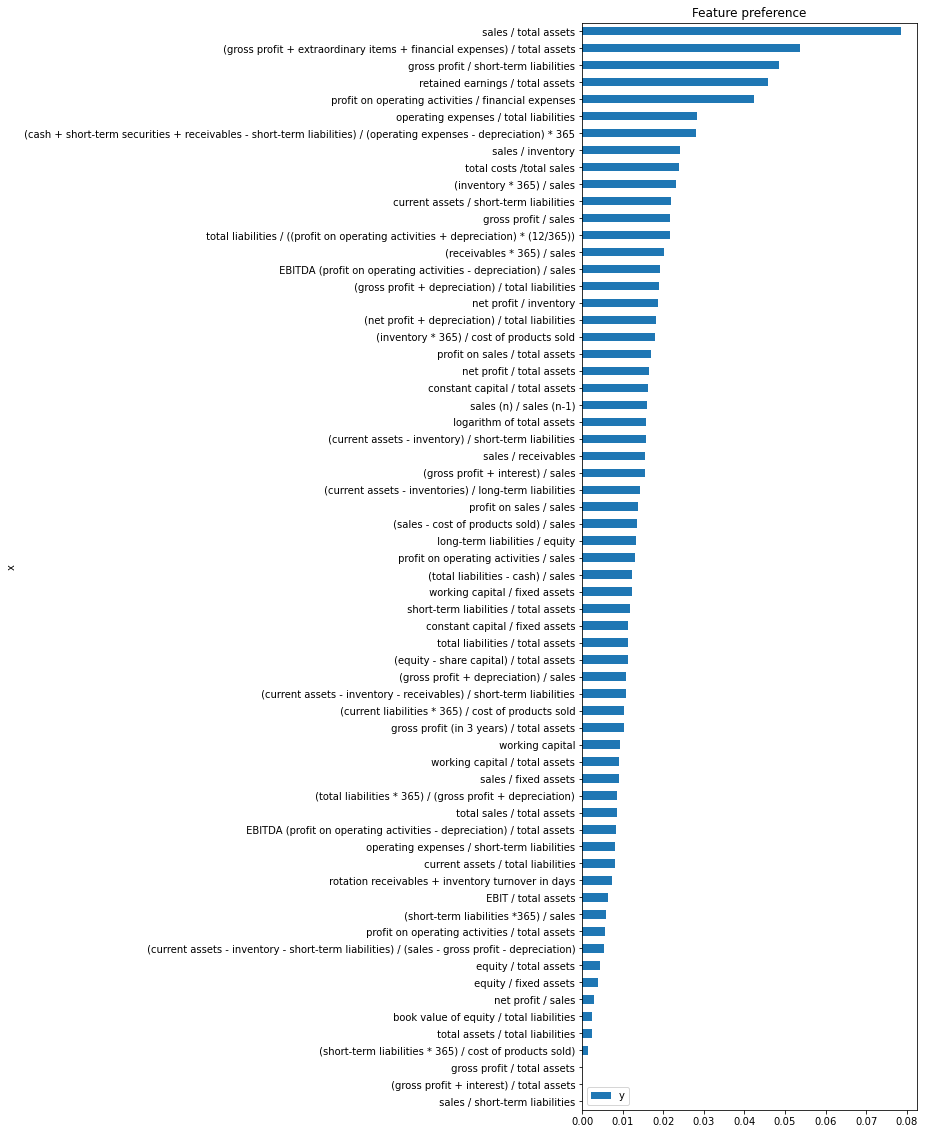

In [24]:
from matplotlib import rcParams
#feature pref
rcParams.update({'figure.autolayout': True})
df = pd.DataFrame({'x' : X.columns, 'y' : list(modele_xbg.feature_importances_)})
df = df.sort_values('y')
fig, ax = plt.subplots()
df.plot(kind='barh', x='x', y='y', ax=ax,figsize=(6, 20))
plt.title("Feature preference")


Without surprise sales and profit are the best indicator of the health of a company. 

## API preparation
Fit all year and save model to use in the API.

In [28]:
from joblib import dump, load

x=1
xgb = XGBClassifier(**params_tuned)
for year in years:
    X = year[year.columns[:-1]]
    Y = year[year.columns[-1]]
    modele_xbg = xbg.fit(X, Y)
    dump(modele_xbg, f'data/{x}year.joblib') 
    x+=1